In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Poly features for 1-variable

In [5]:
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X = np.array([0.5])
poly_features.fit([X])
X_poly = poly_features.transform([X])
print(X_poly)

[[0.5]]


In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X = np.array([0.5])
poly_features.fit([X])
X_poly = poly_features.transform([X])
print(X_poly)

[[0.5  0.25]]


In [7]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X = np.array([0.5])
poly_features.fit([X])
X_poly = poly_features.transform([X])
print(X_poly)

[[0.5   0.25  0.125]]


# Polynomial features for 2 variables

In [8]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X = np.array([0.5, 0.4])
poly_features.fit([X])
X_poly = poly_features.transform([X])
print(X_poly)

[[0.5  0.4  0.25 0.2  0.16]]


In [9]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X = np.array([0.5, 0.4])
poly_features.fit([X])
X_poly = poly_features.transform([X])
print(X_poly)

[[0.5   0.4   0.25  0.2   0.16  0.125 0.1   0.08  0.064]]


# Generate polynomial features for 3-variables, d = 2, 3, 4

# Polynomial Regression

In [10]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [11]:
X[:5], y[:5]

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 array([[1.61761105],
        [8.06185944],
        [4.45250583],
        [0.77958493],
        [1.84625712]]))

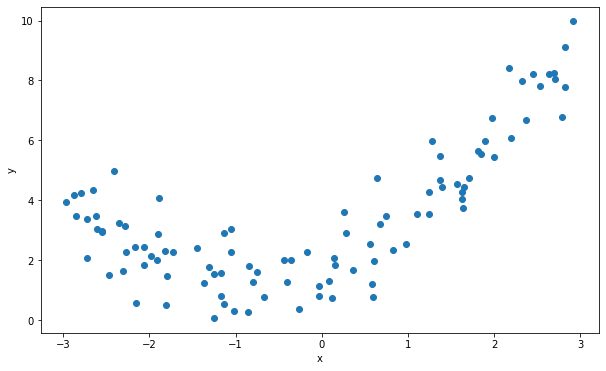

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

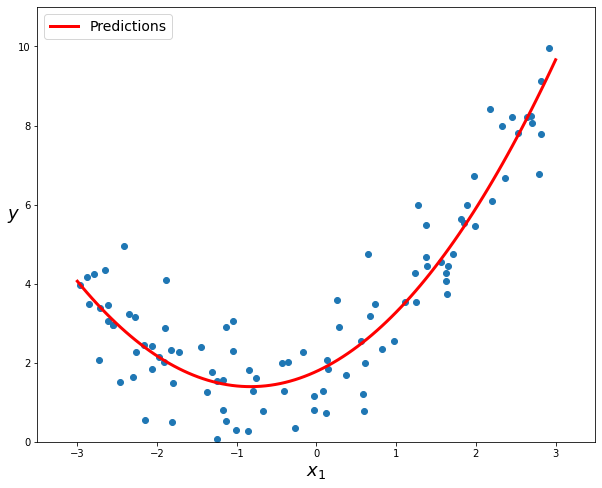

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_new, lin_reg.predict(X_new_poly), 'r-', linewidth=3, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3.5, 3.5, 0, 11])
plt.show()

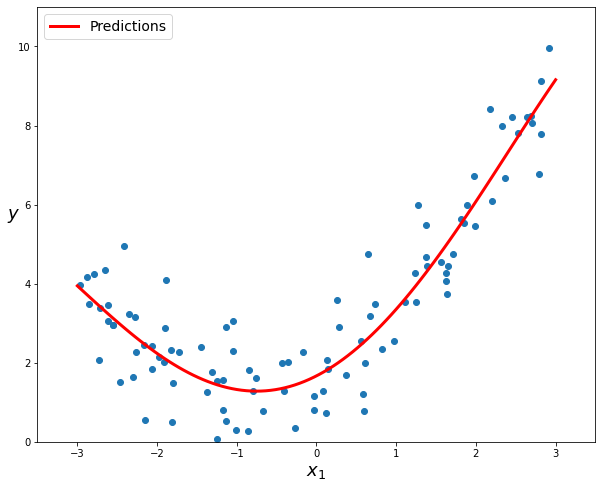

In [24]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_new, lin_reg.predict(X_new_poly), 'r-', linewidth=3, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3.5, 3.5, 0, 11])
plt.show()

## Underfitting and Overfitting

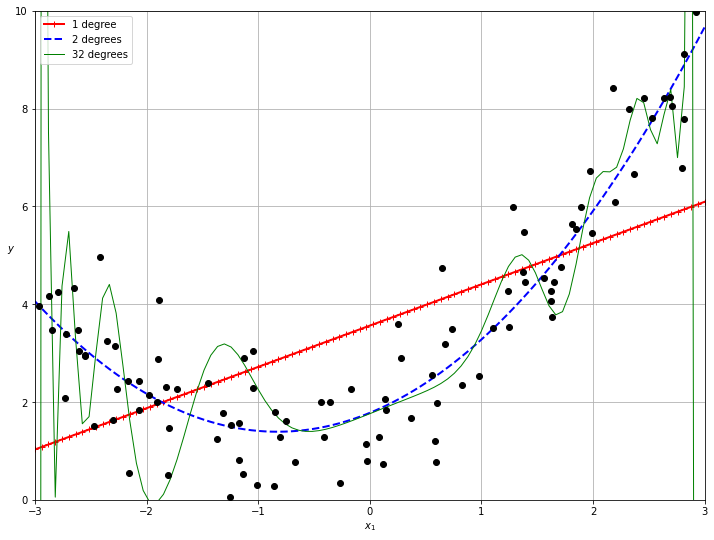

In [28]:
plt.figure(figsize=(12, 9))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 32)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    X_poly = polybig_features.fit_transform(X)
    lin_reg.fit(X_poly, y)
    X_new_poly = polybig_features.transform(X_new)
    y_newbig = lin_reg.predict(X_new_poly)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "ko", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()